In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pltr
import string
import re
import nltk
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv(r"Myocardial infarction complications Database.csv")


In [ ]:
df.shape


(1700, 124)

In [ ]:
df.tail(5)


,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
1695,1696,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1696,1697,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1697,1698,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,1699,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,1,0,0,0,0,0,1
1699,1700,63.0,1,2.0,NaN,NaN,NaN,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 124 entries, ID to LET_IS
dtypes: float64(110), int64(14)
memory usage: 1.6 MB


In [ ]:
df.isnull().sum()

ID             0
AGE            8
SEX            0
INF_ANAM       4
STENOK_AN    106
            ... 
DRESSLER       0
ZSN            0
REC_IM         0
P_IM_STEN      0
LET_IS         0
Length: 124, dtype: int64

In [ ]:
# Fill null values with the mean of each column
df_filled_mean = df.fillna(df.mean())

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Drop any rows with missing values
#df.dropna(inplace=True)

# Separate features and target variable
X = df.iloc[:, :112]  # Input features
y = df.iloc[:, -12:]  # Complications and outcomes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Build the Neural Network
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(12, activation='sigmoid'))  # Output layer, assuming binary classification for each complication

# Step 3: Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the Model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Step 5: Evaluate the Model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", accuracy)

Epoch 1/50
34/34 [==============================] - 1s 11ms/step - loss: nan - accuracy: 0.4669 - val_loss: nan - val_accuracy: 0.4669
Epoch 2/50
34/34 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.4669 - val_loss: nan - val_accuracy: 0.4669
Epoch 3/50
34/34 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.4669 - val_loss: nan - val_accuracy: 0.4669
Epoch 4/50
34/34 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.4669 - val_loss: nan - val_accuracy: 0.4669
Epoch 5/50
34/34 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.4669 - val_loss: nan - val_accuracy: 0.4669
Epoch 6/50
34/34 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.4669 - val_loss: nan - val_accuracy: 0.4669
Epoch 7/50
34/34 [==============================] - 0s 13ms/step - loss: nan - accuracy: 0.4669 - val_loss: nan - val_accuracy: 0.4669
Epoch 8/50
34/34 [==============================] - 1s 16ms

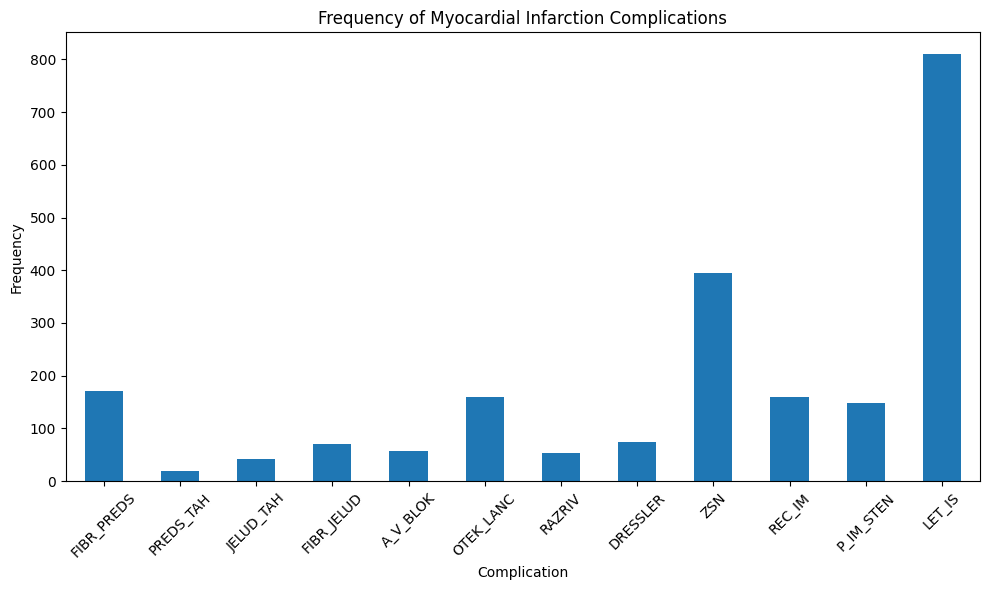

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the data

# Extract complication columns
complications_columns = df.columns[-12:]  #  the last 12 columns represent complications
complications_data = df[complications_columns]

# Count the frequency of each complication
complications_counts = complications_data.sum()

# Plot the bar graph
plt.figure(figsize=(10, 6))
complications_counts.plot(kind='bar')
plt.title('Frequency of Myocardial Infarction Complications')
plt.xlabel('Complication')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

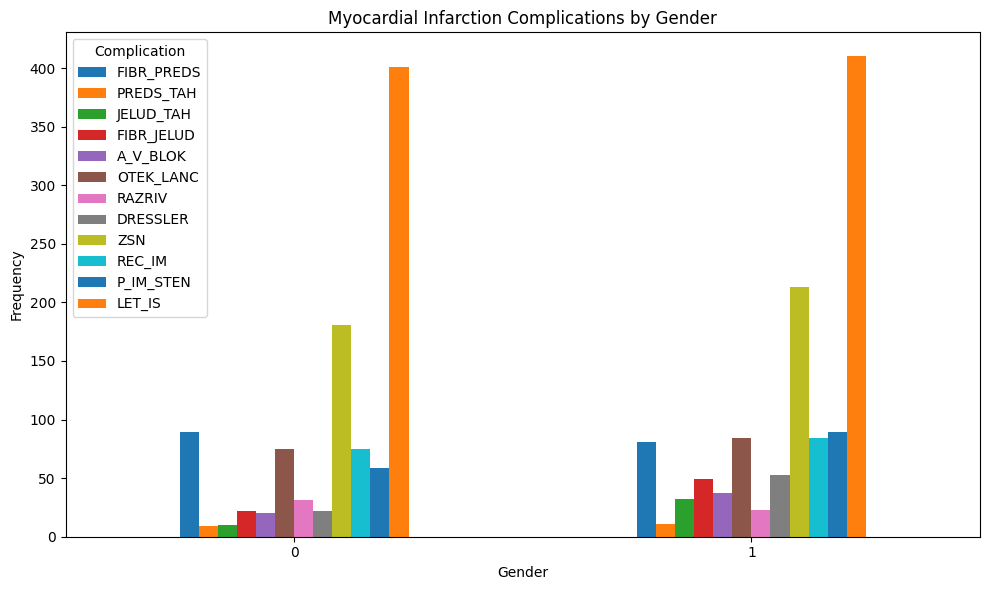

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
gender_complications_data = df[['SEX'] + list(df.columns[-12:])]# Grouping the data by gender and summing the complication counts
gender_complications_counts = gender_complications_data.groupby('SEX').sum()
#0 - female and 1- male
# Plotting the bar graph
gender_complications_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Myocardial Infarction Complications by Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Complication')
plt.tight_layout()
plt.show()

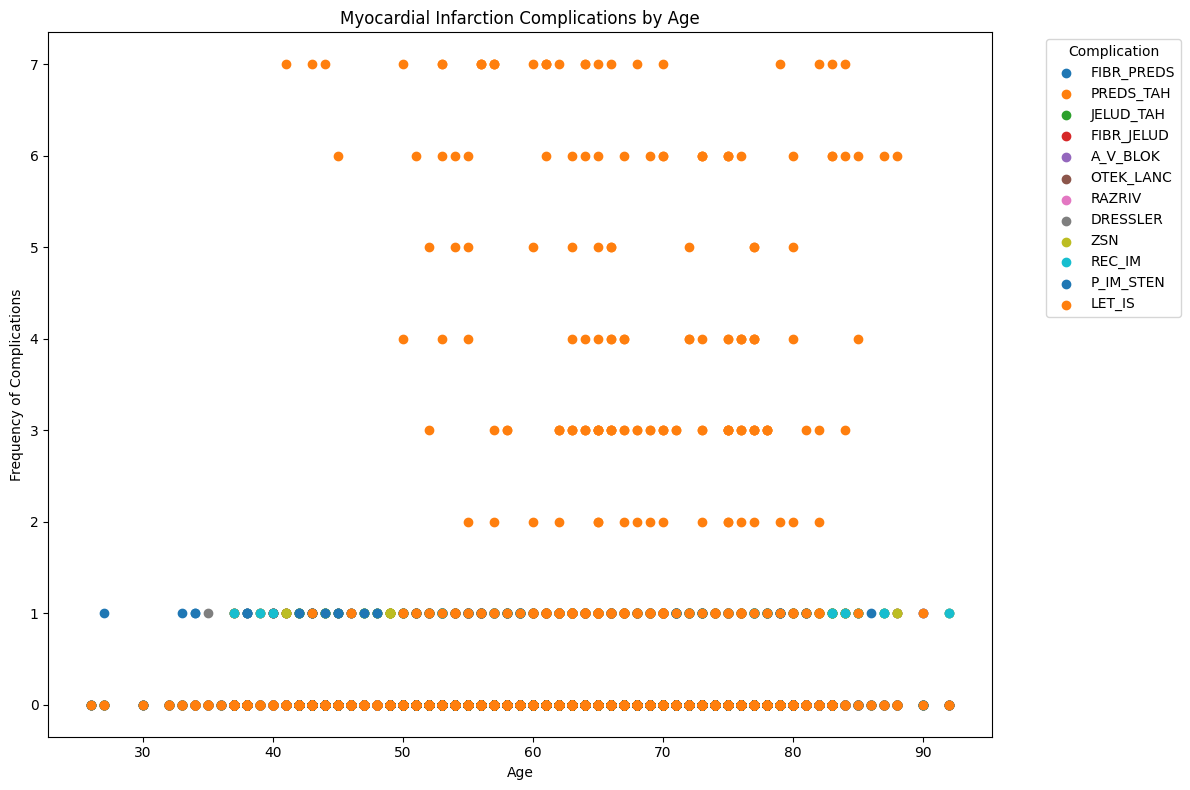

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the data

# Extract age and last 12 complication columns
age_complications_data = df[['AGE'] + list(df.columns[-12:])]

# Plotting scatter plots for each complication
plt.figure(figsize=(12, 8))
for complication in age_complications_data.columns[1:]:
    plt.scatter(age_complications_data['AGE'], age_complications_data[complication], label=complication)

plt.title('Myocardial Infarction Complications by Age')
plt.xlabel('Age')
plt.ylabel('Frequency of Complications')
plt.legend(title='Complication', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

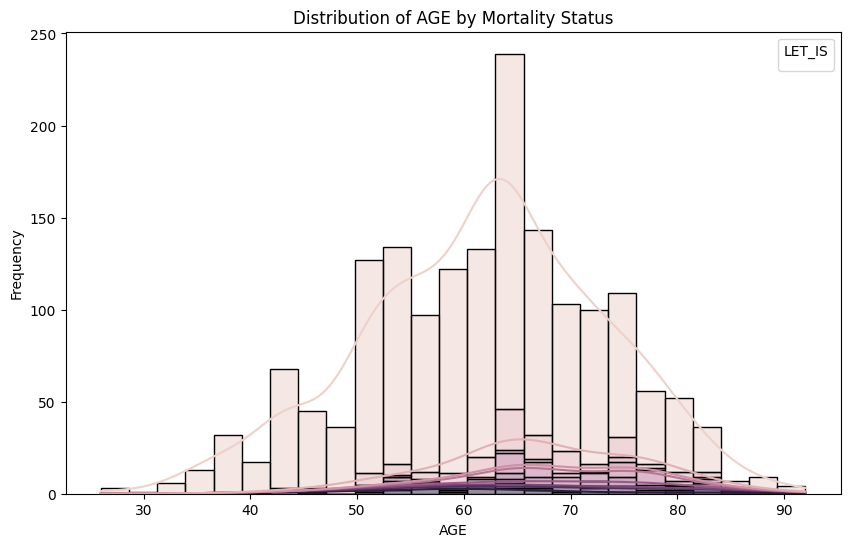

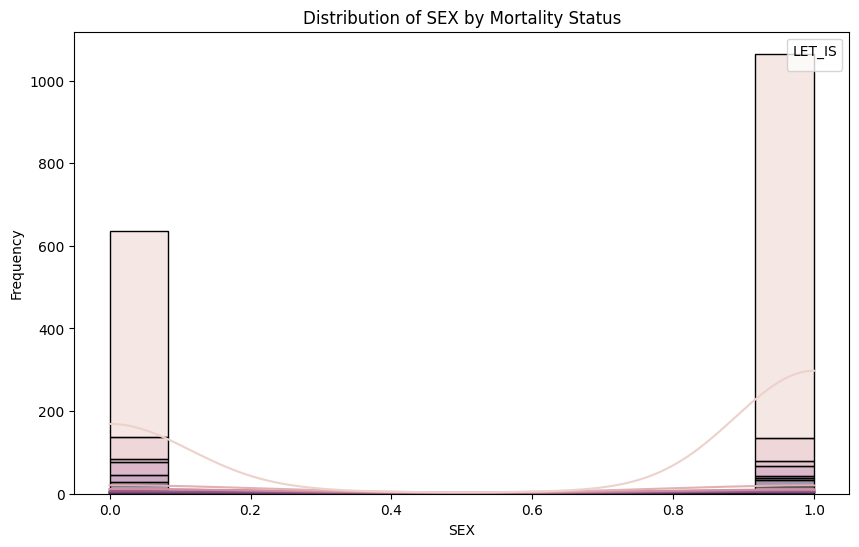

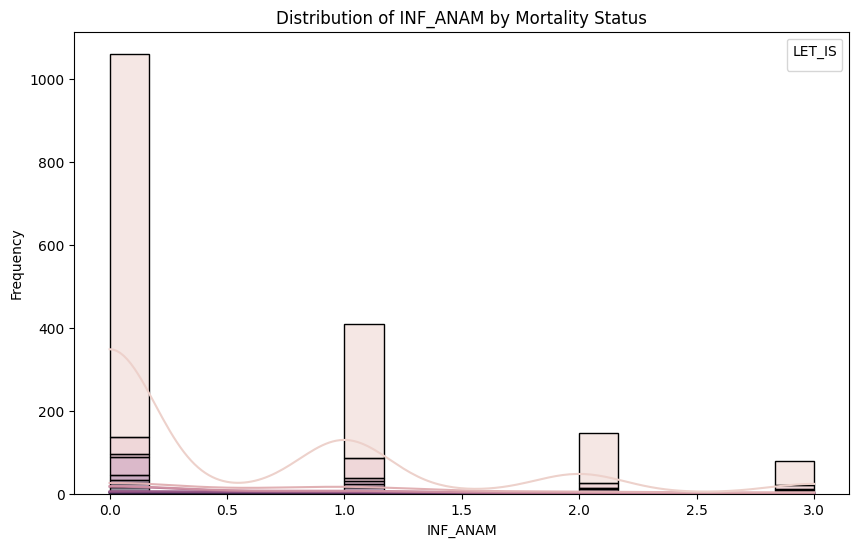

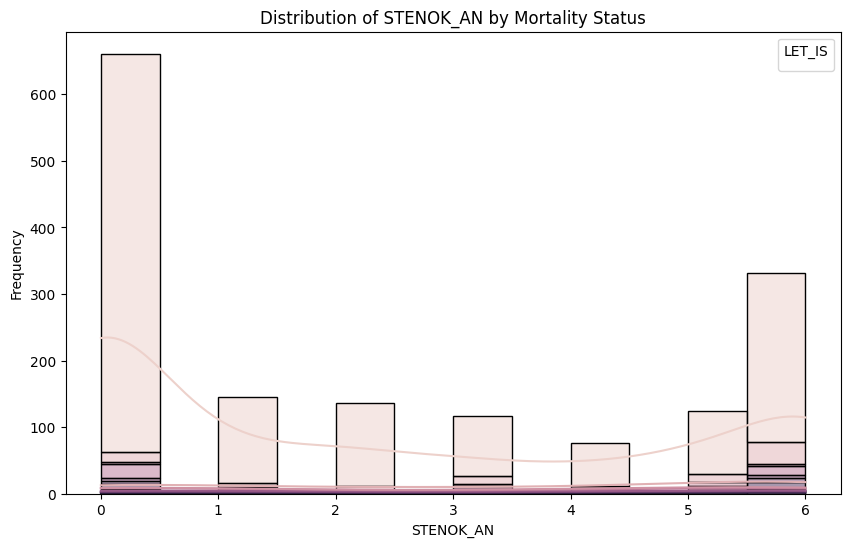

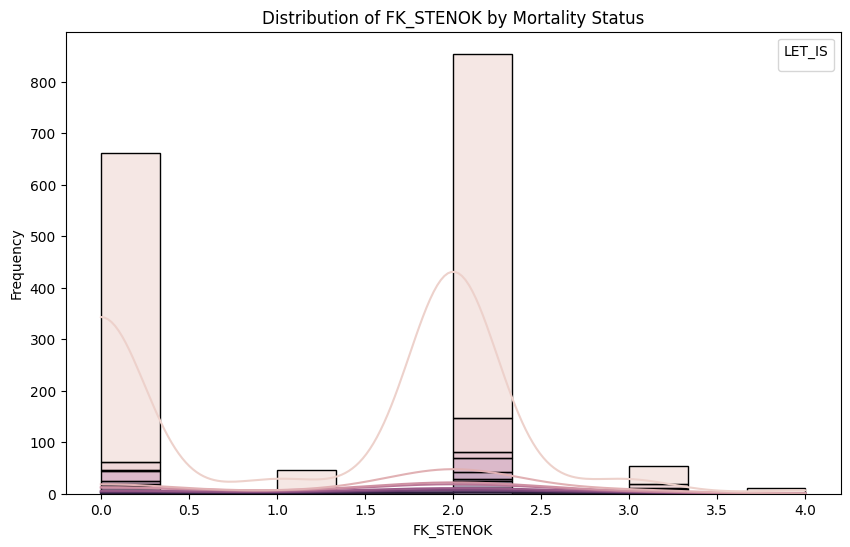

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Extracting  relevant columns ( mortality status(LET_IS) and important input features)
relevant_columns = ['LET_IS', 'AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK']

 ###include more important features
  #INF_ANAM- Quantity of myocardial infarctions in the anamnesi,0 – zero
 #1 – one
 #2 – two
 #3 – three and more
 #STENOK_AN- Exertional angina pectoris in the anamnesis,0 – never
 #1 – during the last year
 #2 – one year ago
 #3 – two years ago
 #4 – three years ago
 #5 – 4-5 years ago
 #6 – more than 5 years ago
 #FK_STENOK- Functional class (FC) of angina pectoris in the last year, 0 – there is no angina pectoris
 #2 – II FC
 #3 – III FC.
 #4 – IV FC'''
data = df[relevant_columns]


# Visualize Distributions
for feature in relevant_columns[1:]:  # Exclude 'LET_IS'
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=feature, hue='LET_IS', kde=True, multiple='stack')
    plt.title('Distribution of ' + feature + ' by Mortality Status')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(title='LET_IS', loc='upper right')
    plt.show()

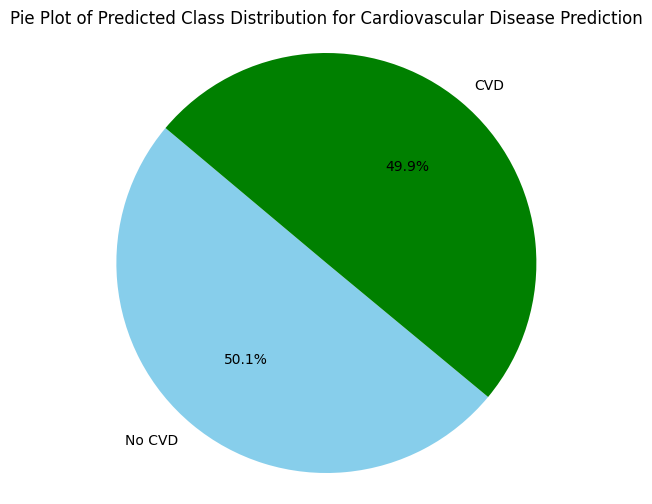

In [ ]:
predicted_probabilities = np.random.rand(1000)
actual_labels = np.random.randint(0, 2, size=1000)
threshold = 0.5
predicted_classes = (predicted_probabilities > threshold).astype(int)

# Count the number of predictions for each class
class_counts = np.bincount(predicted_classes)

# Plotting the pie plot of predicted class distribution
labels = ['No CVD', 'CVD']
colors = ['skyblue', 'green']

plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=labels, colors=colors,autopct='%1.1f%%', startangle=140)
plt.title('Pie Plot of Predicted Class Distribution for Cardiovascular Disease Prediction')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

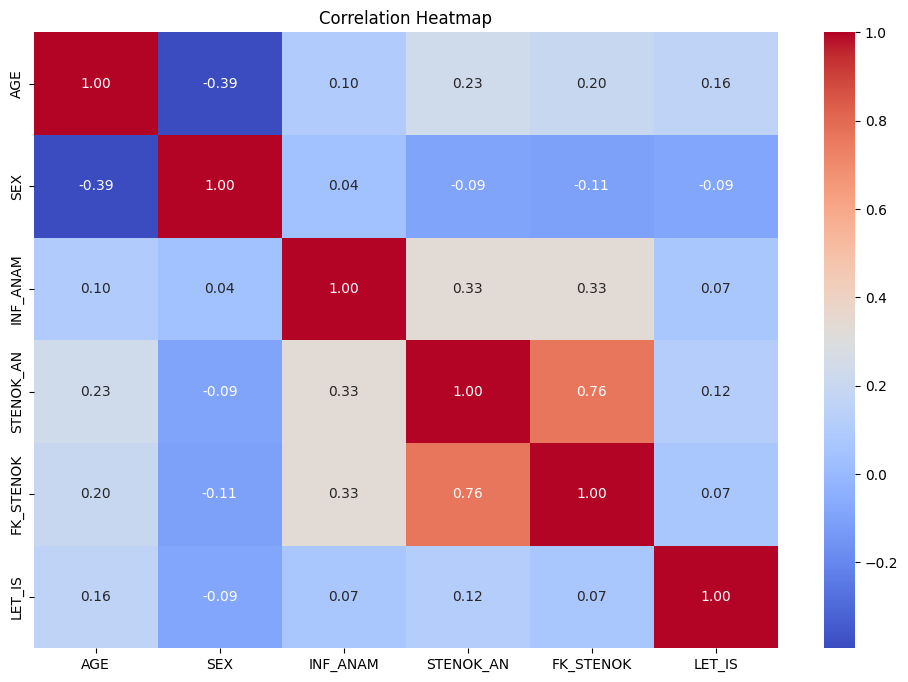

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the data

# Extract relevant columns
relevant_columns = ['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'LET_IS']

# Select the relevant data
data = df[relevant_columns]

# Calculate the correlation matrix
corr_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

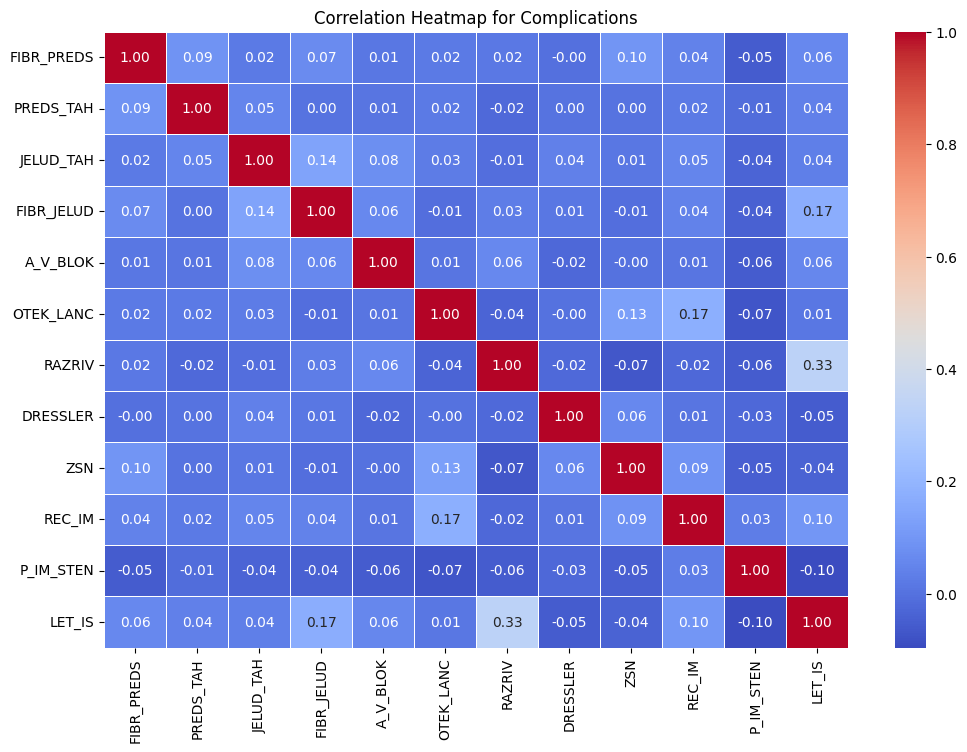

In [ ]:
# Get the last 12 columns of the data
complications_columns = df.columns[-12:]

# Subset the dataset to include only the last 12 columns (complications)
complications_data = df[complications_columns]

# Calculate the correlation matrix for the complications
correlation_matrix_complications = complications_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_complications, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for Complications')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.855


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[85  8]
 [21 86]]
Accuracy: 0.855
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        93
           1       0.91      0.80      0.86       107

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200

